In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tidyr’ was built under R version 4.2.3”


In [5]:
umap_results <- arrow::read_parquet("../results/NF0014/3.organoid_fs_profiles_umap.parquet")
head(umap_results)

patient,object_id,unit,dose,treatment,image_set,Well,UMAP1,UMAP2
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
NF0014,40,uM,10,Mirdametinib,G8-1,G8,2.0592527,3.0605676
NF0014,24,uM,1,Fimepinostat,D5-1,D5,0.7095713,-0.5088036
NF0014,85,uM,1,Mirdametinib,F8-1,F8,-0.3473186,3.2714994
NF0014,18,nM,10,STAURO,G11-1,G11,2.4931569,1.6196111
NF0014,24,uM,1,Binimetinib,G7-1,G7,1.0814865,3.3740375
NF0014,30,uM,1,Copanlisib,E3-2,E3,1.1907700,2.8520553


In [6]:
treatments <- unique(umap_results$treatment)
treatments

[1] "Mirdametinib" "Fimepinostat" "STAURO"       "Binimetinib"  "Copanlisib"  
 [6] "Selumetinib"  "Cabozantinib" "Onalespib"    "DMSO"         "Rapamycin"   
[11] "Everolimus"   "Imatinib"     "Nilotinib"    "Linsitinib"   "Digoxin"     
[16] "Ketotifen"    "Trametinib"

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 47 rows containing missing values or values outside the scale range
(`geom_point()`).”


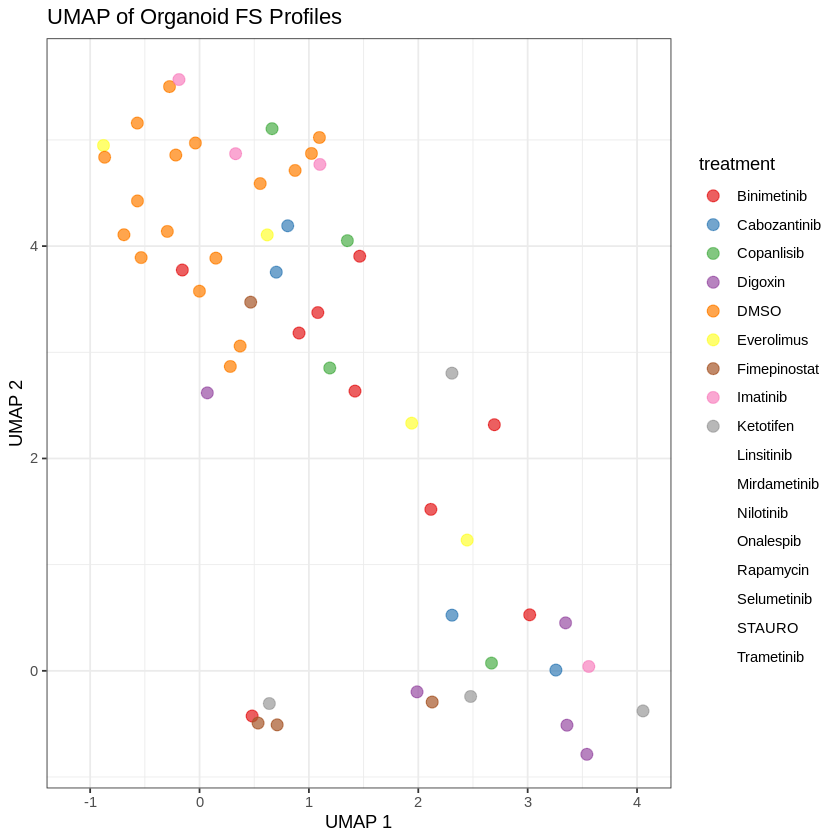

In [ ]:

umap_organoid_plot <- (
    ggplot(umap_results, aes(x = UMAP1, y = UMAP2, color = treatment))
    + geom_point(size = 3, alpha = 0.7)
    + scale_color_brewer(palette = "Set1")
    + labs(title = "UMAP of Organoid FS Profiles", x = "UMAP 1", y = "UMAP 2")
    + theme_bw()
)
umap_organoid_plot


patient,object_id,unit,dose,treatment,image_set,Well,UMAP1,UMAP2
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
NF0014,40,uM,10,Mirdametinib,G8-1,G8,2.0592527,3.0605676
NF0014,24,uM,1,Fimepinostat,D5-1,D5,0.7095713,-0.5088036
NF0014,85,uM,1,Mirdametinib,F8-1,F8,-0.3473186,3.2714994
NF0014,18,nM,10,STAURO,G11-1,G11,2.4931569,1.6196111
NF0014,24,uM,1,Binimetinib,G7-1,G7,1.0814865,3.3740375
NF0014,30,uM,1,Copanlisib,E3-2,E3,1.1907700,2.8520553


Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 702 rows containing missing values or values outside the scale range
(`geom_point()`).”


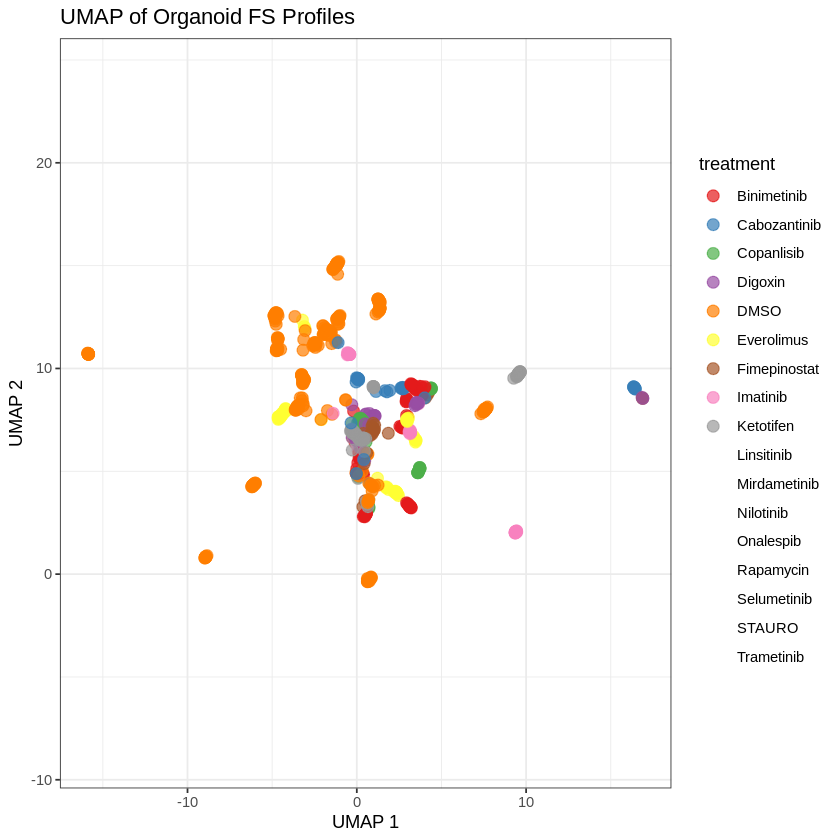

In [4]:
umap_sc_results <- arrow::read_parquet("../results/NF0014/3.sc_fs_profiles_umap.parquet")
head(umap_results)
umap_sc_plot <- (
    ggplot(umap_sc_results, aes(x = UMAP1, y = UMAP2, color = treatment))
    + geom_point(size = 3, alpha = 0.7)
    + scale_color_brewer(palette = "Set1")
    + labs(title = "UMAP of Organoid FS Profiles", x = "UMAP 1", y = "UMAP 2")
    + theme_bw()
)
umap_sc_plot
